## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_result = pd.merge(mouse_metadata, study_results, on = "Mouse ID")

# Display the data table for preview
merge_result

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice_list = merge_result["Mouse ID"].unique()
print(f"The number of mice is {len(mice_list)}.")

The number of mice is 249.


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
trial_data = merge_result.drop_duplicates(subset = ['Mouse ID', 'Timepoint'], keep = 'last')
trial_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mice_initial = trial_data.drop_duplicates(subset = ["Mouse ID"], keep = "first")
mice_final = trial_data.drop_duplicates(subset = ["Mouse ID"], keep = "last")
mice_final

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [6]:
# Checking the number of mice in the clean DataFrame.
regimen_list = trial_data["Drug Regimen"].unique()
regimen_list = sorted(regimen_list)



## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = []
median = []
var = []
std = []
sem = []
count = []

for name in range(10):
    # Singles out 1 regimen at a time
    regimen_name = trial_data.loc[trial_data["Drug Regimen"] == regimen_list[name]]
    mice_count = regimen_name['Mouse ID'].unique()
    count.append(len(mice_count))
    # Finds mean and adds it to mean list
    mean_name = regimen_name['Tumor Volume (mm3)'].mean()
    mean.append(mean_name)
    # Finds median and adds it to median list
    median_name = regimen_name['Tumor Volume (mm3)'].median()
    median.append(median_name)
    # Finds variance and adds it to variance list
    var_name = regimen_name['Tumor Volume (mm3)'].var()
    var.append(var_name)
    # Finds standard deviation and adds it to standard deviation list
    std_name = regimen_name['Tumor Volume (mm3)'].std()
    std.append(std_name)
    # Finds standard error and adds it to standard error list
    sem_name = regimen_name['Tumor Volume (mm3)'].sem()
    sem.append(sem_name)

# Creates data frame with all the data found in the previous for loop
regimen_summary = pd.DataFrame({'Mice': count,
                                'Mean': mean,
                                'Median': median,
                                'Variance': var,
                                'Standard Deviation': std,
                                'Standard Error': sem},
                              index = regimen_list)

regimen_summary['Mean'] = regimen_summary['Mean'].map('{:.3f}'.format)
regimen_summary['Median'] = regimen_summary['Median'].map('{:.3f}'.format)
regimen_summary['Variance'] = regimen_summary['Variance'].map('{:.3f}'.format)
regimen_summary['Standard Deviation'] = regimen_summary['Standard Deviation'].map('{:.3f}'.format)
regimen_summary['Standard Error'] = regimen_summary['Standard Error'].map('{:.3f}'.format)
regimen_summary


,Mice,Mean,Median,Variance,Standard Deviation,Standard Error
Capomulin,25,40.676,41.558,24.948,4.995,0.329
Ceftamin,25,52.591,51.776,39.290,6.268,0.470
Infubinol,25,52.885,51.821,43.129,6.567,0.492
Ketapril,25,55.236,53.699,68.554,8.280,0.604
Naftisol,25,54.332,52.509,66.173,8.135,0.596
Placebo,25,54.034,52.289,61.168,7.821,0.581
Propriva,25,52.383,50.784,43.220,6.574,0.526
Ramicane,25,40.217,40.673,23.487,4.846,0.321
Stelasyn,24,54.233,52.432,59.451,7.710,0.573
Zoniferol,25,53.237,51.818,48.533,6.967,0.516


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# Using the aggregation method, produce the same summary statistics in a single line
regimen_rename = trial_data.rename(columns = {"Tumor Volume (mm3)": "Volume"})
regimen_agg = regimen_rename.groupby("Drug Regimen").Volume.agg(["count","mean","median","var","std","sem"])


regimen_agg['mean'] = regimen_agg['mean'].map('{:.3f}'.format)
regimen_agg['median'] = regimen_agg['median'].map('{:.3f}'.format)
regimen_agg['var'] = regimen_agg['var'].map('{:.3f}'.format)
regimen_agg['std'] = regimen_agg['std'].map('{:.3f}'.format)
regimen_agg['sem'] = regimen_agg['sem'].map('{:.3f}'.format)

regimen_agg


,count,mean,median,var,std,sem
Drug Regimen,,,,,,
Capomulin,230,40.676,41.558,24.948,4.995,0.329
Ceftamin,178,52.591,51.776,39.290,6.268,0.470
Infubinol,178,52.885,51.821,43.129,6.567,0.492
Ketapril,188,55.236,53.699,68.554,8.280,0.604
Naftisol,186,54.332,52.509,66.173,8.135,0.596
Placebo,181,54.034,52.289,61.168,7.821,0.581
Propriva,156,52.383,50.784,43.220,6.574,0.526
Ramicane,228,40.217,40.673,23.487,4.846,0.321
Stelasyn,181,54.233,52.432,59.451,7.710,0.573


## Bar and Pie Charts

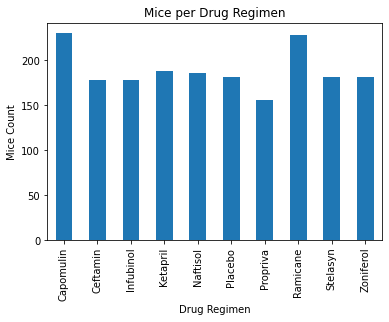

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
regimen_agg.plot.bar( y ="count", legend = False)
plt.ylabel('Mice Count')
plt.title("Mice per Drug Regimen")
plt.show()

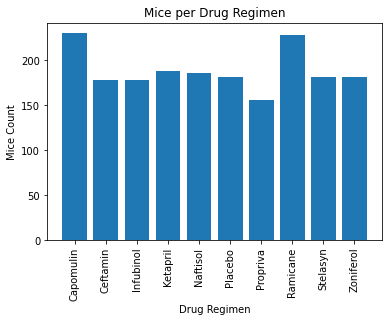

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_pos = [i for i, _ in enumerate(regimen_list)]

plt.bar(x_pos, regimen_agg["count"])
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Count")
plt.title("Mice per Drug Regimen")
plt.xticks(x_pos, regimen_list, rotation = 90)
plt.show()

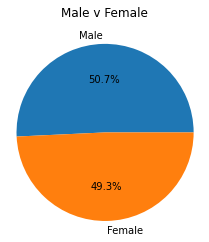

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_count = trial_data["Sex"].value_counts()
sex_count.plot.pie(ylabel = "", figsize = (3.5,3.5),autopct = '%1.1f%%')
plt.title("Male v Female", y = 1.08)
plt.axis('equal')
plt.show()

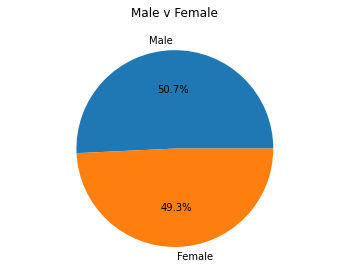

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_count,labels = ['Male', 'Female'], autopct = '%1.1f%%')
plt.title("Male v Female", y = 1.08)
plt.axis('equal')
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
sm_sample = mice_final.loc[(mice_final["Drug Regimen"] == 'Capomulin')| (mice_final["Drug Regimen"] == 'Ramicane')| (mice_final["Drug Regimen"] == 'Infubinol')| (mice_final["Drug Regimen"] == 'Ceftamin')]
sm_sample
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1797,x822,Ceftamin,Male,3,29,45,61.386660,3
1813,y163,Infubinol,Female,17,27,45,67.685569,3
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
1855,y865,Ceftamin,Male,23,26,45,64.729837,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
sm_treat_list = sm_sample["Drug Regimen"].unique() 
# Create empty list to fill with tumor vol data (for plotting)
Ramicane = []
Capomulin = []
Infubinol = []
Ceftamin = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for type in sm_treat_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    rows = sm_sample.loc[(sm_sample["Drug Regimen"] == type),"Tumor Volume (mm3)"]
    
    # add subset 
    if type == "Ramicane":
        Ramicane.append(rows)
    elif type == "Capomulin":
        Capomulin.append(rows)
    elif type == "Infubinol":
        Infubinol.append(rows)
    elif type == "Ceftamin":
        Ceftamin.append(rows)
    # Determine outliers using upper and lower bounds
def bounds(treatment, lowerq, upperq, iqr, median):
    print("-------------------------------------------------------")

    
    print()
    print(f"The lower quartile of {treatment} is: {lowerq}")
    print(f"The upper quartile of {treatment} is: {upperq}")
    print(f"The interquartile range of {treatment} is: {iqr}")
    print(f"The the median of {treatment} is: {median} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print()





In [15]:
print("Treatment Boundries")
print()

# Ramicane bounds
Ra_q1 = np.quantile(Ramicane, .25)
Ra_center = np.quantile(Ramicane, .5)
Ra_q3 = np.quantile(Ramicane, .75)
Ra_iqr = Ra_q3 - Ra_q1

bounds("Ramicane", Ra_q1, Ra_q3, Ra_iqr, Ra_center)


# Capomulin bounds
Ca_q1 = np.quantile(Capomulin, .25)
Ca_center = np.quantile(Capomulin, .5)
Ca_q3 = np.quantile(Capomulin, .75)
Ca_iqr = Ca_q3 - Ca_q1

bounds("Campmulin", Ca_q1, Ca_q3, Ca_iqr, Ca_center)

# Infubinol bounds
In_q1 = np.quantile(Infubinol, .25)
In_center = np.quantile(Infubinol, .5)
In_q3 = np.quantile(Infubinol, .75)
In_iqr = In_q3 - In_q1


bounds("Infubinol", In_q1, In_q3, In_iqr, In_center)

# Ceftamin bounds
Ce_q1 = np.quantile(Ceftamin, .25)
Ce_center = np.quantile(Ceftamin, .5)
Ce_q3 = np.quantile(Ceftamin, .75)
Ce_iqr = Ce_q3 - Ce_q1


bounds("Ceftamin", Ce_q1, Ce_q3, Ce_iqr, Ce_center)



Treatment Boundries

-------------------------------------------------------

The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.

-------------------------------------------------------

The lower quartile of Campmulin is: 32.37735684
The upper quartile of Campmulin is: 40.1592203
The interquartile range of Campmulin is: 7.781863460000004
The the median of Campmulin is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.

-------------------------------------------------------

The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The the median of Infubinol is: 60.16518046 
Values below 3

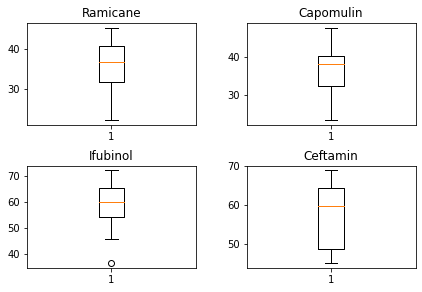

In [22]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, axs = (plt.subplots(2,2))

axs[0,0].boxplot(Ramicane)
axs[0,0].set_title("Ramicane")



axs[0,1].boxplot(Capomulin)
axs[0,1].set_title("Capomulin")


axs[1,0].boxplot(Infubinol)
axs[1,0].set_title("Ifubinol")

axs[1,1].boxplot(Ceftamin)
axs[1,1].set_title("Ceftamin")

fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)

## Line and Scatter Plots

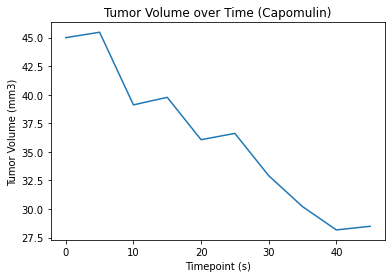

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
x401 = trial_data[trial_data["Mouse ID"] == 'x401']

x401.plot.line(x = "Timepoint", y = "Tumor Volume (mm3)", legend = False)
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (s)")
plt.title("Tumor Volume over Time (Capomulin)")
plt.show()

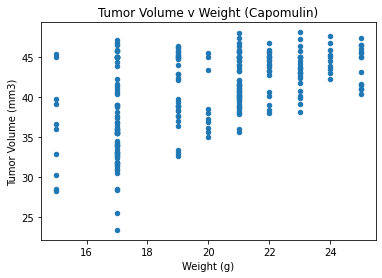

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Ca_df = trial_data[trial_data["Drug Regimen"] == 'Capomulin']
Ca_df.plot.scatter(x = "Weight (g)", y = "Tumor Volume (mm3)")
plt.title("Tumor Volume v Weight (Capomulin)")
plt.show()

## Correlation and Regression

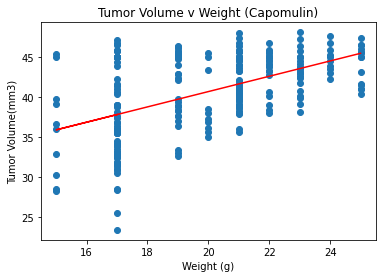

The correlation coefficient between Weight and Tumor Volume is 0.53


In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
sm_ca_df = Ca_df[["Weight (g)", "Tumor Volume (mm3)"]]
x_values = sm_ca_df['Weight (g)']
y_values = sm_ca_df['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title("Tumor Volume v Weight (Capomulin)")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume(mm3)")
plt.show()

print(f'The correlation coefficient between Weight and Tumor Volume is {round(st.pearsonr(x_values,y_values)[0],2)}')